## Heart Disease Analysis

### Background information and Problems

- Heart disease is one of the deadliest diseases in this contemporary world. According to The World Heart Organization (WHO) heart disease or Cardiovascular Diseases (CVDs) are the number 1 cause of death globaly, taking lives almost 17.9 million each year. In United States, new statitics predict that 45 percent of people in United States will at least have one issue related with heart in 2045. American Heart Association (AHA) predicts that costs related to heart disease will double in 2030 become 1.1 trillion from 555 billion in 2016. Which according to the Association could bankrupt the nation's economy and healthcare system.

- **source: **
- https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1
- https://www.healthline.com/health-news/why-is-heart-disease-on-the-rise#:~:text=New%20statistics%20predict%20that%2045,of%2040%20percent%20by%202030.

### Goals

- With the Cleveland dataset that we have, we can have a several goals:
    - Analyzing what cause heart disease
    - Predicting people with heart disease using machine learning thus an early treatment can be execute quickly
    - Prevent people to have a heart disease in the future

### Import Common Package

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

#### Getting Data and Basic Information of the data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

### No object data within the the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Describing Data

In [4]:
heartdesc=[]
for i in df.columns:
    heartdesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum())/(len(df))) *100),2),
        df[i].nunique(),
        df[i].unique(),
    ])
    
pd.DataFrame(data= heartdesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'NUnique', 
                'Unique Sample'
                
            ])

,Data Features,Data Type,Null,Null Percentage,NUnique,Unique Sample
0,age,int64,0,0.0,41,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
1,sex,int64,0,0.0,2,"[1, 0]"
2,cp,int64,0,0.0,4,"[3, 2, 1, 0]"
3,trestbps,int64,0,0.0,49,"[145, 130, 120, 140, 172, 150, 110, 135, 160, ..."
4,chol,int64,0,0.0,152,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
5,fbs,int64,0,0.0,2,"[1, 0]"
6,restecg,int64,0,0.0,3,"[0, 1, 2]"
7,thalach,int64,0,0.0,91,"[150, 187, 172, 178, 163, 148, 153, 173, 162, ..."
8,exang,int64,0,0.0,2,"[0, 1]"
9,oldpeak,float64,0,0.0,40,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."


- age
- sex
- chest pain type (typical = 0, asymptotic = 3, nonaginal = 2, nontypical = 1)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina (1 = yes 0 =  no)
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [5]:
df.describe().T

### The patient average age of the patient is 54 years old, the youngest is 29 and the oldest is 77
### Patient's cholestrol average is 246, with the lowest is 126 and the highest is 564

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Checking Missing Values

In [6]:
df.isna().sum()

#### No missing value, thats great so dont need to worry anything about it

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking and Handling Outliers

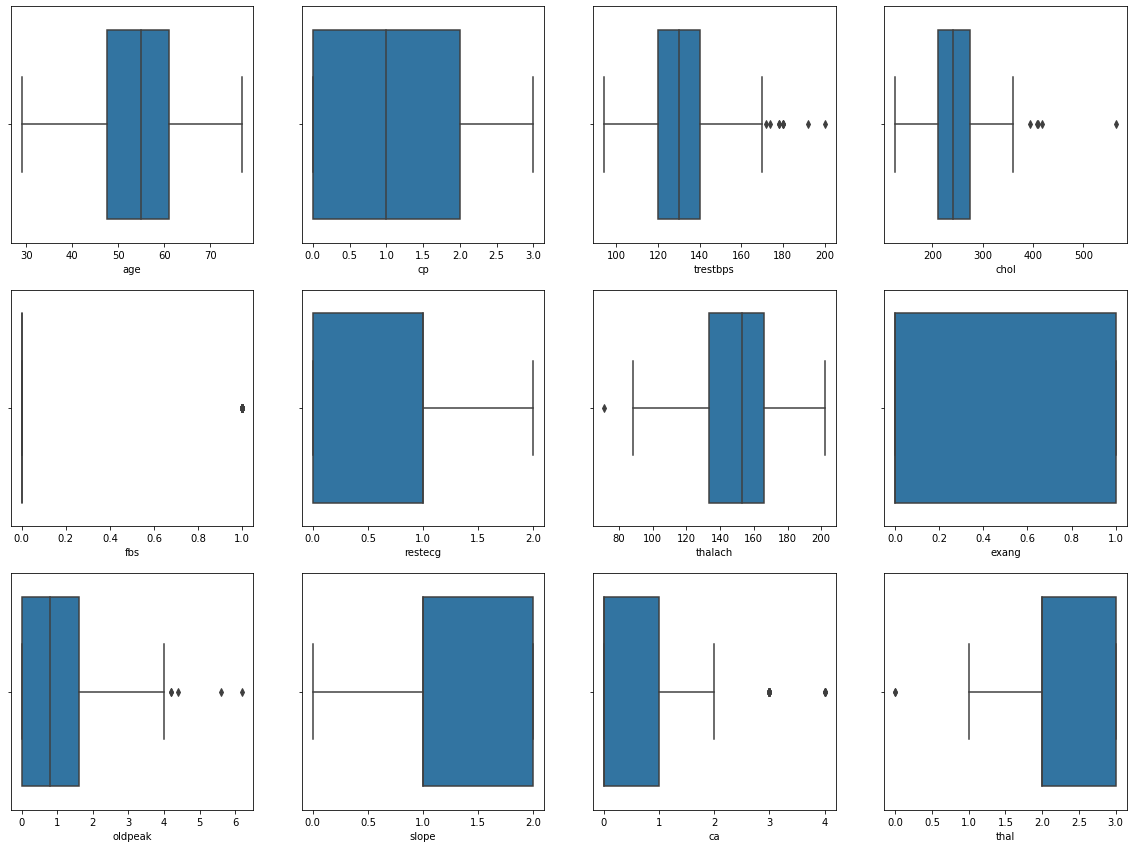

In [7]:
df_describe = df.drop(columns = ['sex','target'])
plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.describe().columns:
    plt.subplot(4,4,x)
    sns.boxplot(df[column])
    x+=1
plt.tight_layout
plt.show()

### There are some datas with outliers, such as restbps, chol, thalach, oldpeak, ca and thal
### However we going to leave that since its not too many and wont bother the analysis

### Exploratory Data Analysis

#### Univariate

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Target

In [9]:
df['target'].value_counts()

### Data pretty balance, with what we can see is that 165 people have heart disease and 138 not

1    165
0    138
Name: target, dtype: int64

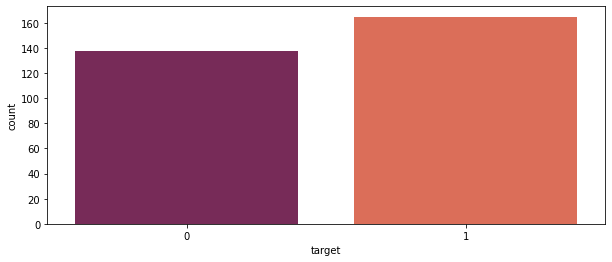

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(df['target'], palette ='rocket')
plt.show()

#### Age

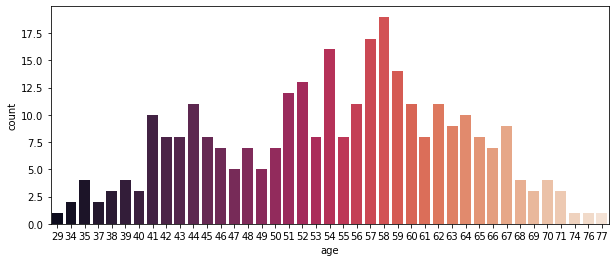

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(df['age'], palette ='rocket')
plt.show()
### From this graphic it shown taht majority of the patient is 58 years old

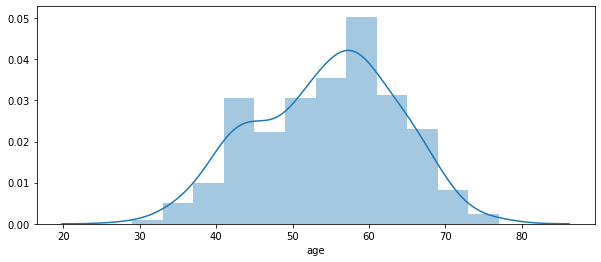

In [12]:
plt.figure(figsize=(10,4))
sns.distplot(df['age'])
plt.show()

- To make the analyze easier we're going to binning the age base on the age grouping
- source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2856461/

In [13]:
bin_age = [25, 45, 65, 75, df['age'].max()]
label_age = ['Young Adults', 'Middle Age Adults', 'Young Old Adults', 'Old Old Adults']

df['Age Group'] = pd.cut(df['age'], bins = bin_age, labels = label_age)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Middle Age Adults
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adults
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adults
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Age Adults
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Age Adults


In [14]:
df['Age Group'].value_counts()

Middle Age Adults    206
Young Adults          64
Young Old Adults      31
Old Old Adults         2
Name: Age Group, dtype: int64

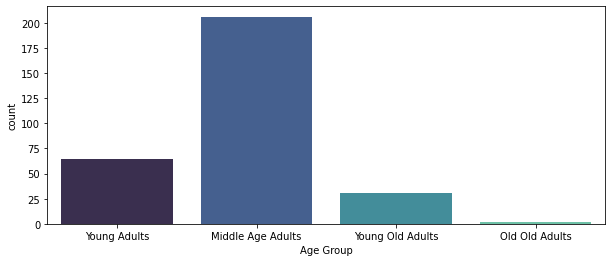

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(df['Age Group'], palette ='mako')
plt.show()
### young adults = 25–44
### middle-aged adults = 45–64
### young-old adults = 65–74 
### old-old adults = 75–91 

### From the tables and figure the majority of the patient came from middle age adults
### Only 2 patients that comes for old old adults group

#### Sex

In [16]:
df['sex'].value_counts()
## 1 = male
## 0 = female

1    207
0     96
Name: sex, dtype: int64

In [17]:
df.stb.freq(['sex'], cum_cols = False)

,sex,count,percent
0,1,207,68.316832
1,0,96,31.683168


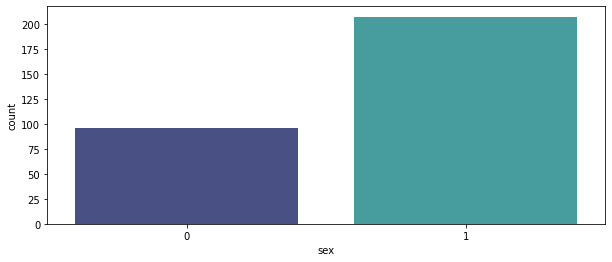

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(df['sex'], palette ='mako')
plt.show()

### From the table and figure we can see that there are more men than woman patients
### 68 Percent are men

#### Chest pain

In [19]:
df.stb.freq(['cp'], cum_cols = False)
###Value 0: typical angina
###Value 1: atypical angina
### Value 2: non-anginal pain
## Value 3 : asymptomatic

,cp,count,percent
0,0,143,47.194719
1,2,87,28.712871
2,1,50,16.501650
3,3,23,7.590759


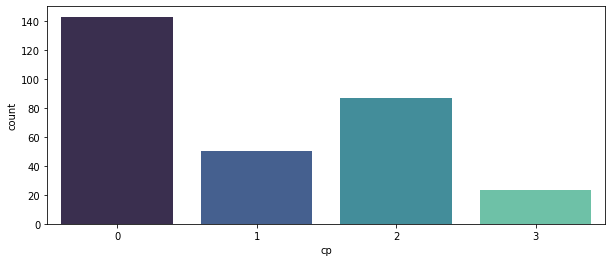

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(df['cp'], palette ='mako')
plt.show()

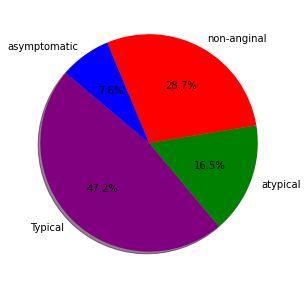

In [21]:
labels = "Typical", "atypical", "non-anginal", "asymptomatic"
sizes = [143, 50, 87, 23]
colors = ['purple', 'green', 'red','blue']
explode = (0, 0, 0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()
### From the figure we can see that majority of the patietn felt typical chest pain 47 percent of it

#### Fasting Blood Sugar (Diabetes)

In [22]:
df.stb.freq(['fbs'], cum_cols = False)

###(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

,fbs,count,percent
0,0,258,85.148515
1,1,45,14.851485


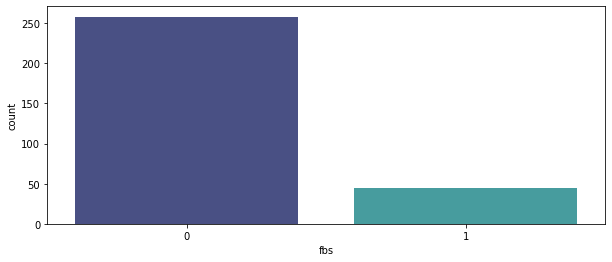

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(df['fbs'], palette ='mako')
plt.show()

### Majority of patient have blood sugar below 120mg/dl, meaning they do not have diabetes

In [24]:
df.stb.freq(['restecg'], cum_cols = False)

#restecg: resting electrocardiographic results
#- Value 0: normal
#- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

,restecg,count,percent
0,1,152,50.165017
1,0,147,48.514851
2,2,4,1.320132


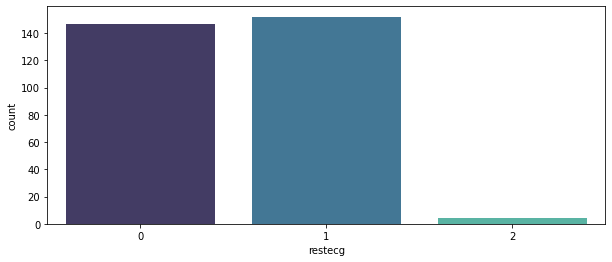

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(df['restecg'], palette ='mako')
plt.show()
### Onlt 1 percent or 4 patient who showing probable ventricula hypertrophy
## 49 percent of patient showing normal resting ecltrocardiographic result
### The other 50 percent showing abnormaility in the electrocardiographic

#### Exang

In [28]:
df.stb.freq(['exang'], cum_cols = False)
#exang: exercise induced angina (1 = yes; 0 = no)

,exang,count,percent
0,0,204,67.326733
1,1,99,32.673267


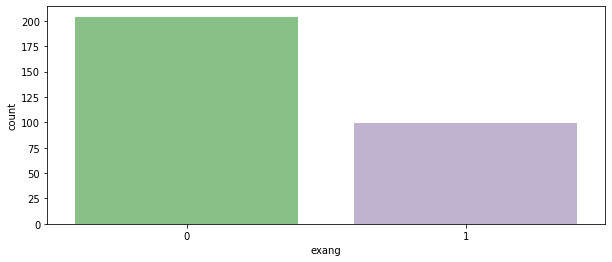

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(df['exang'], palette ='Accent')
plt.show()
### From the table we can see that most of the people felt angina or chest pain after exercise is only 32 percent of it

In [30]:
df['oldpeak'].describe()
#ST depression induced by exercise relative to rest

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

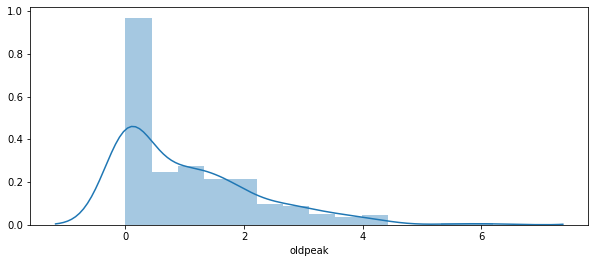

In [31]:
plt.figure(figsize=(10,4))
sns.distplot(df['oldpeak'])
plt.show()

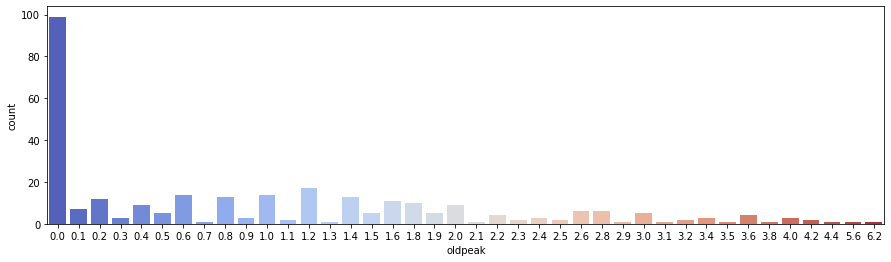

In [32]:
plt.figure(figsize=(15,4))
sns.countplot(df['oldpeak'], palette ='coolwarm')
plt.show()

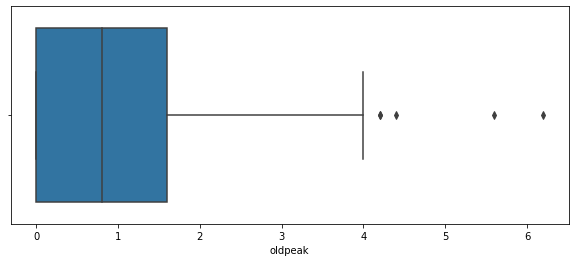

In [33]:
plt.figure(figsize=(10,4))
sns.boxplot(df['oldpeak'])
plt.show()
### From the figures above we can see that the majority of the people have 0 st depression that induced by exercise
### However there are some outliers within the data, but for now we going to leave it first

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Middle Age Adults
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adults
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adults
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Age Adults
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Age Adults


In [35]:
df.stb.freq(['slope'], cum_cols = False)
# slope - the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)

,slope,count,percent
0,2,142,46.864686
1,1,140,46.204620
2,0,21,6.930693


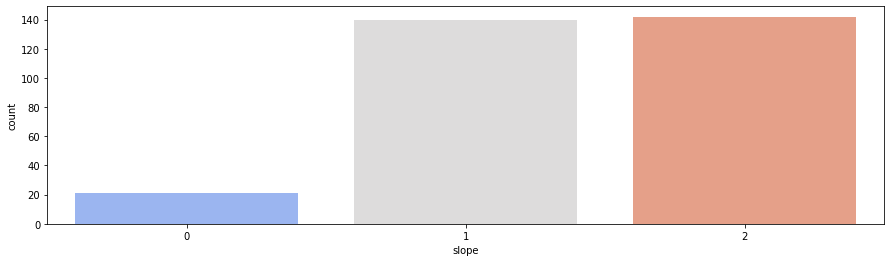

In [36]:
plt.figure(figsize=(15,4))
sns.countplot(df['slope'], palette ='coolwarm')
plt.show()
### From the figure patient with upsloping ST Segment are very low
### As for flat and downslopping almost have the same value, 140 and 142.
### Meaning that probably many patient have a heart disease due to ischemia
### And very few due to the acute occulsion of LAD

## Source 
#https://ecgwaves.com/st-segment-normal-abnormal-depression-elevation-causes/#:~:text=ST%20segment%20deviation%20(elevation%2C%20depression,conditions%2C%20particularly%20acute%20myocardial%20ischemia.

In [37]:
df.stb.freq(['ca'], cum_cols = False)
### Ca = number of major vessels (0-3) colored by flourosopy

,ca,count,percent
0,0,175,57.755776
1,1,65,21.452145
2,2,38,12.541254
3,3,20,6.600660
4,4,5,1.650165


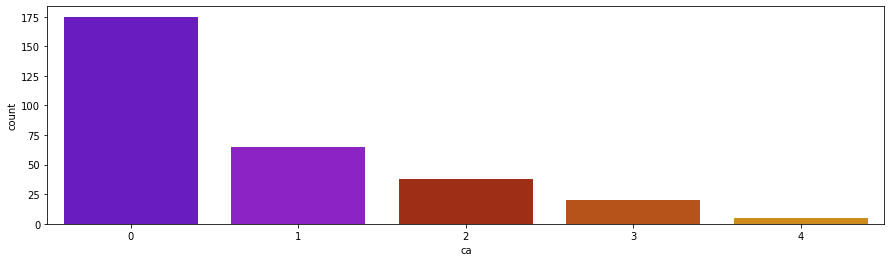

In [38]:
plt.figure(figsize=(15,4))
sns.countplot(df['ca'], palette ='gnuplot')
plt.show()
### The fiugres shown that flouroscopy did not identify any color in majority of the patient
### only 5 people who have been colourd in their major vessel
### Assuming that many people have a normal major vessel

In [39]:
df.stb.freq(['thal'], cum_cols= False)
### thal = a blood disorder - 3 = normal; 6 = fixed defect; 7 = reversable defect
### The data need more explanation since the source did not state the meaning of the value
### But I assume that from the inforamtion 0 = normal 1 = fixed defect  2 = reversable defect

,thal,count,percent
0,2,166,54.785479
1,3,117,38.613861
2,1,18,5.940594
3,0,2,0.660066


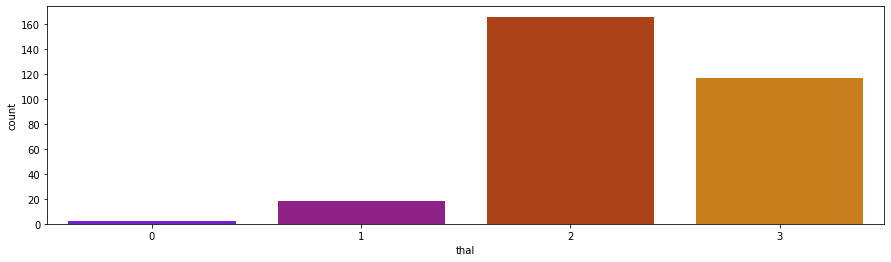

In [40]:
plt.figure(figsize=(15,4))
sns.countplot(df['thal'], palette ='gnuplot')
plt.show()

In [41]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

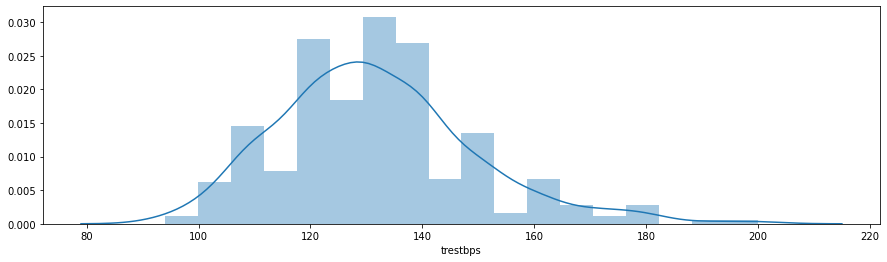

In [42]:
plt.figure(figsize=(15,4))
sns.distplot(df['trestbps'])
plt.show()

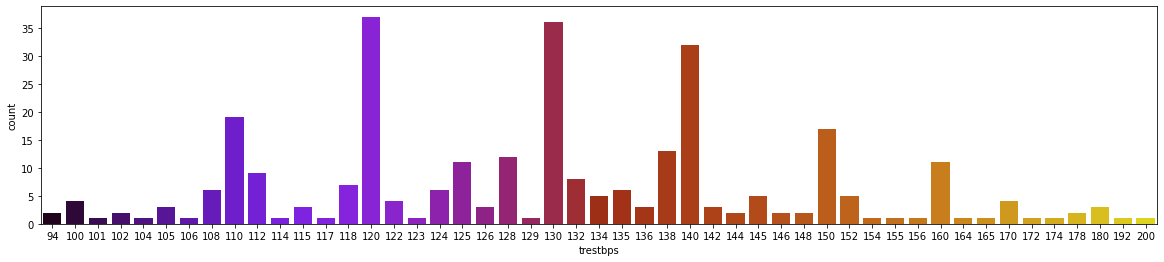

In [43]:
plt.figure(figsize=(20,4))
sns.countplot(df['trestbps'], palette ='gnuplot')
plt.show()

In [47]:
### To make the analyze esaier we going to binning the blood pressure into groups
bin_bps = [90,119, 139, df['trestbps'].max()]
label_bps = ['Low Blood Pressure', 'Ideal Blood Pressure', 'High Blood Pressure']

df['BP Group'] = pd.cut(df['trestbps'], bins = bin_bps, labels = label_bps)
df.head()
##Source = 
#https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/#:~:text=ideal%20blood%20pressure%20is%20considered,be%2090%2F60mmHg%20or%20lower

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group,BP Group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Middle Age Adults,High Blood Pressure
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adults,Ideal Blood Pressure
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adults,Ideal Blood Pressure
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Age Adults,Ideal Blood Pressure
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Age Adults,Ideal Blood Pressure


In [48]:
df.stb.freq(['BP Group'], cum_cols= False)

,BP Group,count,percent
0,Ideal Blood Pressure,146,48.184818
1,High Blood Pressure,97,32.013201
2,Low Blood Pressure,60,19.801980


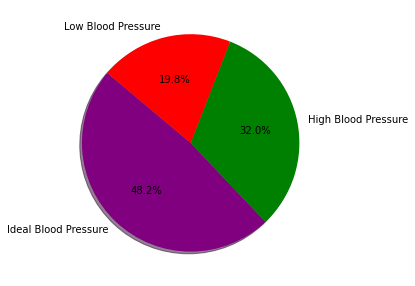

In [49]:
labels = "Ideal Blood Pressure", "High Blood Pressure", "Low Blood Pressure"
sizes = [146,97,60]
colors = ['purple', 'green', 'red']
explode = (0, 0, 0)
plt.figure(figsize=(15,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()
### From the analysis we can see that many patients have ideal blood pressure
### But there are also people with high blood pressure

In [52]:
### To make the analyze esaier we going to binning the cholestrol into groups
bin_chol = [150,200, 239, df['chol'].max()]
label_chol = ['Low Cholestrol', 'Borderline Cholestrol', 'High Cholestrol']

df['Cholestrol Level'] = pd.cut(df['chol'], bins = bin_chol, labels = label_chol)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group,BP Group,Cholestrol Level
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Middle Age Adults,High Blood Pressure,Borderline Cholestrol
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adults,Ideal Blood Pressure,High Cholestrol
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adults,Ideal Blood Pressure,Borderline Cholestrol
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Age Adults,Ideal Blood Pressure,Borderline Cholestrol
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Age Adults,Ideal Blood Pressure,High Cholestrol


In [53]:
df.stb.freq(['Cholestrol Level'], cum_cols= False)

,Cholestrol Level,count,percent
0,High Cholestrol,155,52.013423
1,Borderline Cholestrol,97,32.550336
2,Low Cholestrol,46,15.436242


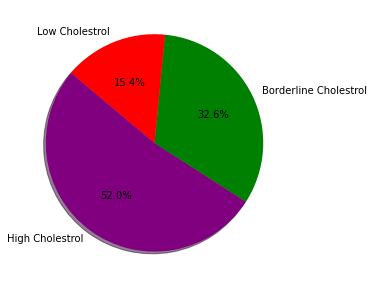

In [54]:
labels = "High Cholestrol", "Borderline Cholestrol", "Low Cholestrol"
sizes = [155,97,46]
colors = ['purple', 'green', 'red']
explode = (0, 0, 0)
plt.figure(figsize=(15,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()
### This shown that 52 percen or majority of the patient have a high cholestrol level

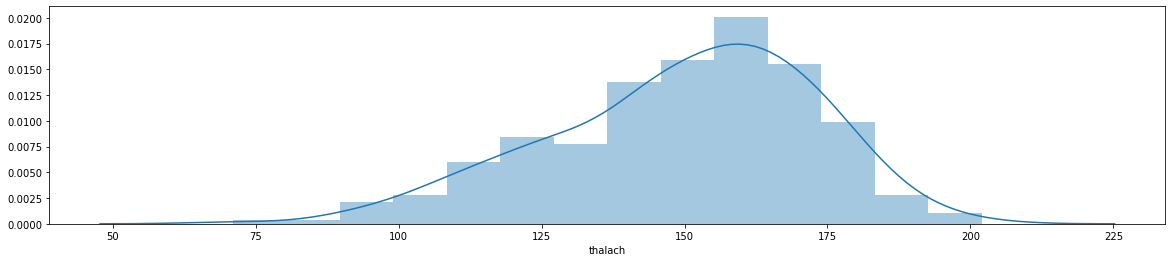

In [89]:
plt.figure(figsize=(20,4))
sns.distplot(df['thalach'])
plt.show()

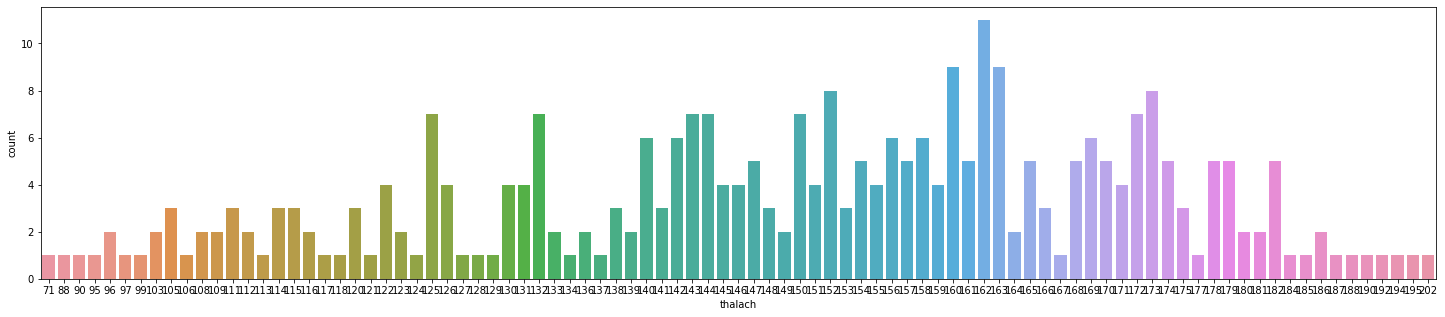

In [92]:
plt.figure(figsize=(25,5))
sns.countplot(df['thalach'])
plt.show()

In [93]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [99]:
bin_hr = [50,100, df['thalach'].max()]
label_hr = ['Normal Rest Heart Rate','High Rest Heart Rate']

df['Heart Rate'] = pd.cut(df['thalach'], bins = bin_hr, labels = label_hr)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group,BP Group,Cholestrol Level,Heart Rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Middle Age Adults,High Blood Pressure,Borderline Cholestrol,High Rest Heart Rate
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adults,Ideal Blood Pressure,High Cholestrol,High Rest Heart Rate
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adults,Ideal Blood Pressure,Borderline Cholestrol,High Rest Heart Rate
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Age Adults,Ideal Blood Pressure,Borderline Cholestrol,High Rest Heart Rate
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Age Adults,Ideal Blood Pressure,High Cholestrol,High Rest Heart Rate


In [100]:
df.stb.freq(['Heart Rate'], cum_cols= False)

,Heart Rate,count,percent
0,High Rest Heart Rate,295,97.359736
1,Normal Rest Heart Rate,8,2.640264


#### Multivariate 

- Since we are going to focus on the target, we are going to analyze each column with the target to see the corelation between columns

In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group,BP Group,Cholestrol Level
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Middle Age Adults,High Blood Pressure,Borderline Cholestrol
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adults,Ideal Blood Pressure,High Cholestrol
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adults,Ideal Blood Pressure,Borderline Cholestrol
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Age Adults,Ideal Blood Pressure,Borderline Cholestrol
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Age Adults,Ideal Blood Pressure,High Cholestrol


In [58]:
pd.crosstab(index = df['target'], columns = df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


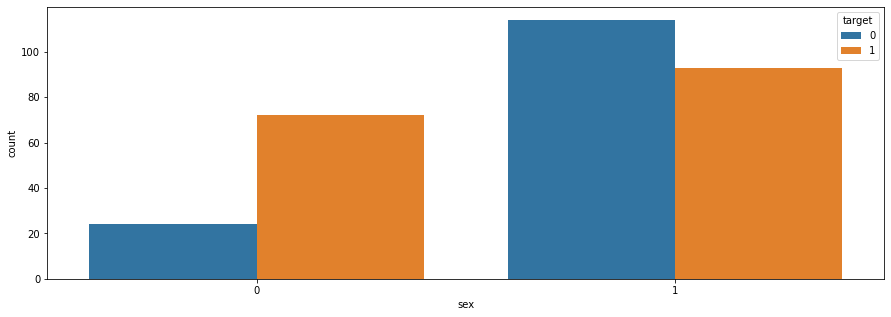

In [59]:
plt.figure(figsize = (15, 5))
sns.countplot(df['sex'], hue = df['target'])
plt.show()
### With majority of the patient is men, it also affect that many men have a heart disease
### only few woman who did not have heart disease
### Most men do not have heart diseases

In [60]:
pd.crosstab(index = df['target'], columns = df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


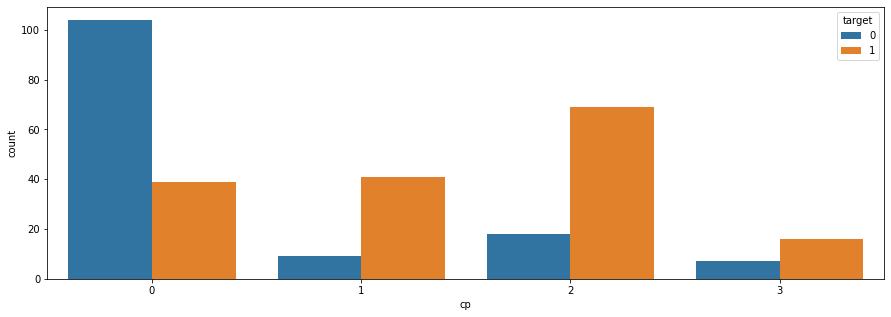

In [61]:
plt.figure(figsize = (15, 5))
sns.countplot(df['cp'], hue = df['target'])
plt.show()
### From the analysis we can see that many patient who experience Non Angina Chest pain 
### have the highest number who have a heart diseases
### People with typical chsest pain have the highest number with patient who doesnot have heart diseases

In [63]:
pd.crosstab(index = df['target'], columns = df['Cholestrol Level'])

Cholestrol Level,Low Cholestrol,Borderline Cholestrol,High Cholestrol
target,,,
0,19,38,79
1,27,59,76


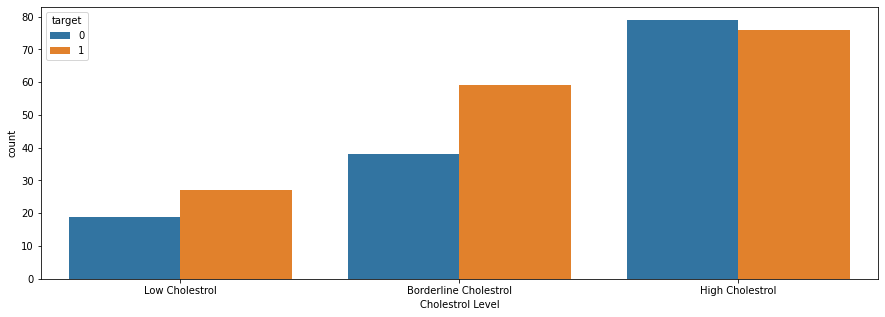

In [65]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Cholestrol Level'], hue = df['target'])
plt.show()

### People with high cholestrol have a higher chance to have a heart disease

In [67]:
pd.crosstab(index = df['target'], columns = df['BP Group'])

### This data somehow is interesting, people with ideal blood presure have a higher chance to have heart disease
### But also low chance to actually have it
### High blood pressure does not mean people have  a heart disease

BP Group,Low Blood Pressure,Ideal Blood Pressure,High Blood Pressure
target,,,
0,23,62,53
1,37,84,44


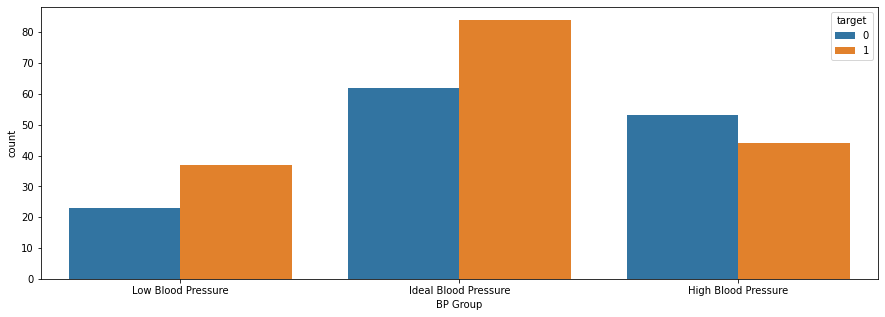

In [68]:
plt.figure(figsize = (15, 5))
sns.countplot(df['BP Group'], hue = df['target'])
plt.show()

In [70]:
pd.crosstab(index = df['target'], columns = df['Age Group'])

Age Group,Young Adults,Middle Age Adults,Young Old Adults,Old Old Adults
target,,,,
0,16,106,15,1
1,48,100,16,1


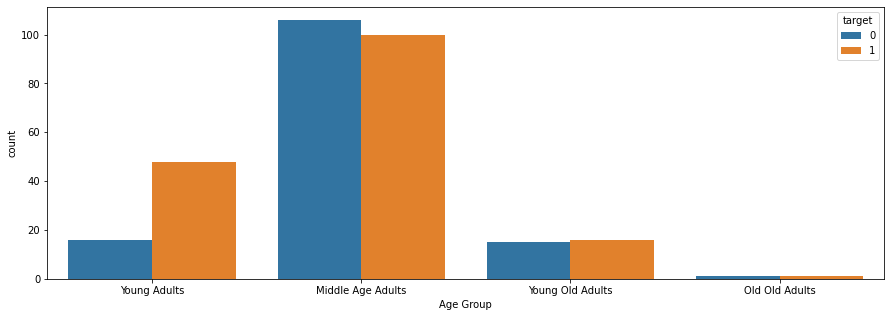

In [71]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Age Group'], hue = df['target'])
plt.show()

### Age seems not really affecting heart disease
### Middle Age Adults have the most patient with heart diseases
### Majority of the young adults have heart diseases

In [73]:
pd.crosstab(index = df['target'], columns = df['fbs'])

fbs,0,1
target,,
0,116,22
1,142,23


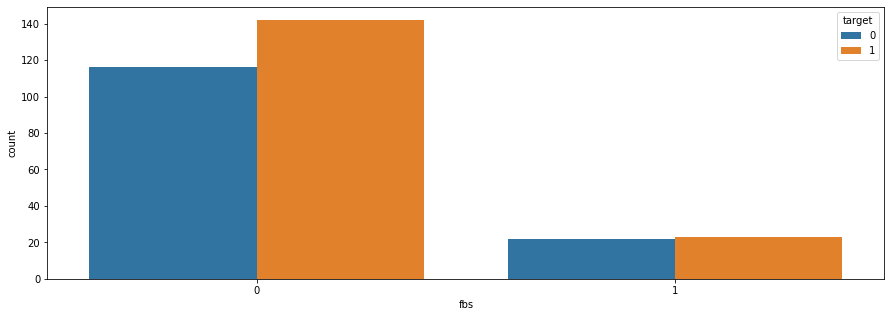

In [74]:
plt.figure(figsize = (15, 5))
sns.countplot(df['fbs'], hue = df['target'])
plt.show()
### Lower blood sugar does not mean people are safe from heart disease

In [76]:
pd.crosstab(index = df['target'], columns = df['restecg'])

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


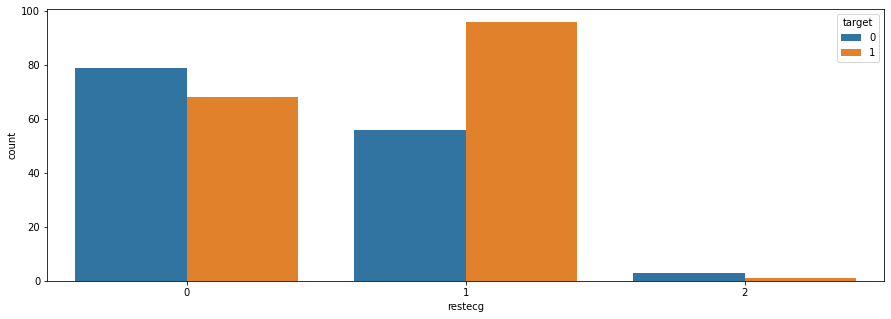

In [77]:
plt.figure(figsize = (15, 5))
sns.countplot(df['restecg'], hue = df['target'])
plt.show()
### People with abnormality in the electrocardiographi tends to have a heart diseases almost half of it

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group,BP Group,Cholestrol Level
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Middle Age Adults,High Blood Pressure,Borderline Cholestrol
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adults,Ideal Blood Pressure,High Cholestrol
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adults,Ideal Blood Pressure,Borderline Cholestrol
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Age Adults,Ideal Blood Pressure,Borderline Cholestrol
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Age Adults,Ideal Blood Pressure,High Cholestrol


In [79]:
pd.crosstab(index = df['target'], columns = df['exang'])

exang,0,1
target,,
0,62,76
1,142,23


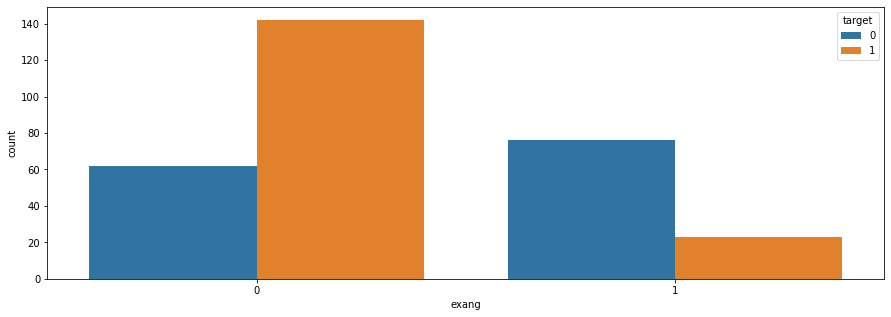

In [80]:
plt.figure(figsize = (15, 5))
sns.countplot(df['exang'], hue = df['target'])
plt.show()

### Most patient who does not feel pain during excercise have higher number of heart diseases

In [81]:
pd.crosstab(index = df['target'], columns = df['slope'])

slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


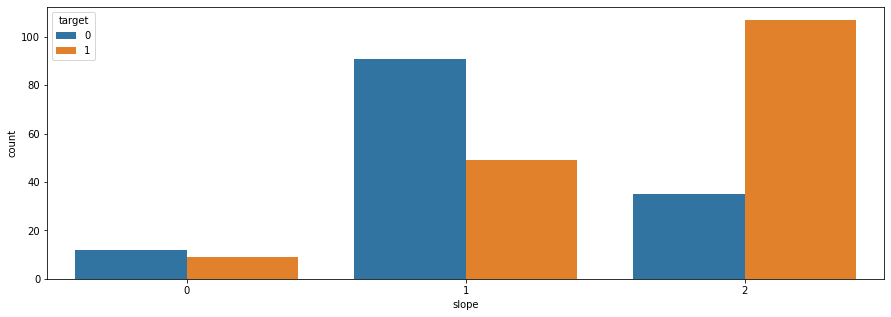

In [83]:
plt.figure(figsize = (15, 5))
sns.countplot(df['slope'], hue = df['target'])
plt.show()
### 2 means that people have downsloping slope in their ST segment
### Meaning that this patient might have ischemia that can cause heart disease

In [84]:
pd.crosstab(index = df['target'], columns = df['ca'])

ca,0,1,2,3,4
target,,,,,
0,45,44,31,17,1
1,130,21,7,3,4


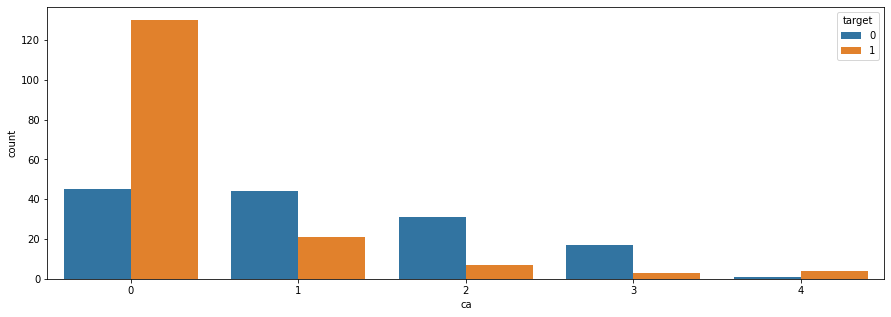

In [85]:
plt.figure(figsize = (15, 5))
sns.countplot(df['ca'], hue = df['target'])
plt.show()
### People with zero color within their major vessel, have a higher number of heart disease than the others


In [87]:
pd.crosstab(index = df['target'], columns = [df['Cholestrol Level'],df['BP Group']])

Cholestrol Level     Low Cholestrol                                           \
BP Group         Low Blood Pressure Ideal Blood Pressure High Blood Pressure   
target                                                                         
0                                 3                    8                   8   
1                                 7                   13                   7   

Cholestrol Level Borderline Cholestrol                       \
BP Group            Low Blood Pressure Ideal Blood Pressure   
target                                                        
0                                   10                   14   
1                                   13                   31   

Cholestrol Level                        High Cholestrol                       \
BP Group         High Blood Pressure Low Blood Pressure Ideal Blood Pressure   
target                                                                         
0                                 14                  9                   39   
1                                 15                 15                   40   

Cholestrol Level                      
BP Group         High Blood Pressure  
target                                
0                                 31  
1                                 21

In [ ]:
### Higher colesthrol still is the main reason that people have a heart disease rather than people with high blood pressure

In [88]:
pd.crosstab(index = df['target'], columns = [df['cp'],df['exang']])

cp       0       1      2      3   
exang    0   1   0  1   0  1   0  1
target                             
0       34  70   8  1  14  4   6  1
1       29  10  38  3  62  7  13  3

In [ ]:
### Non-Angnia chest pain still the main cause of heart disease
### Excerse that induce agnia does not mean pople have heart diseases

In [101]:
pd.crosstab(index = df['target'], columns = df['Heart Rate'])

Heart Rate,Normal Rest Heart Rate,High Rest Heart Rate
target,,
0,7,131
1,1,164


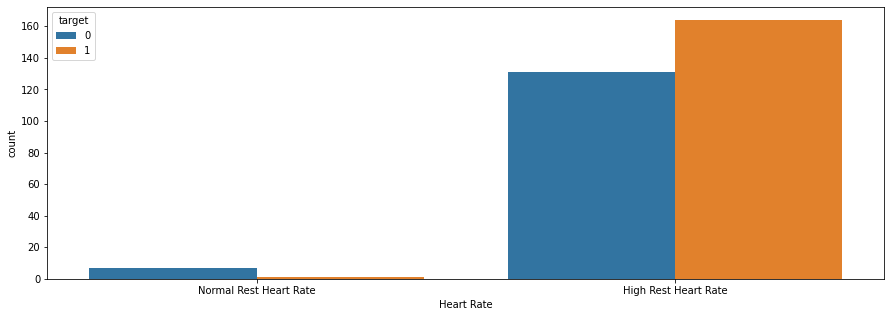

In [102]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Heart Rate'], hue = df['target'])
plt.show()

### Patient with higher rest heart rate have more chance to get heart diseases

### Conclusion

- 